In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing datasets

In [2]:
train=pd.read_csv("traintitanic.csv")
test=pd.read_csv("testtitanic.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# finding the shape of datasets

In [5]:
train.shape,test.shape

((891, 12), (418, 11))

In [6]:
train1=train.copy()
test1=test.copy()

# finding the missing values in the dataset

In [7]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# visualizing the train dataset

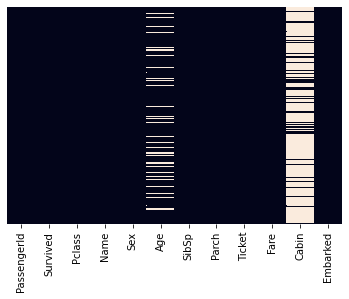

In [11]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False)

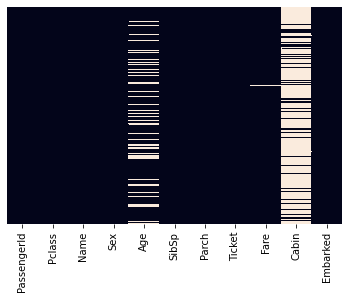

In [12]:
sns.heatmap(test1.isnull(),yticklabels=False,cbar=False)

from the heatmap we conclude that,the columns "Age" and "Cabin" contains more number of null values soo we have to get read of that by using the preprocessing techniques 

In [13]:
train1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
test1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# univariate analysis

In [15]:
train1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
#percentage distribution using normalize function
train1['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

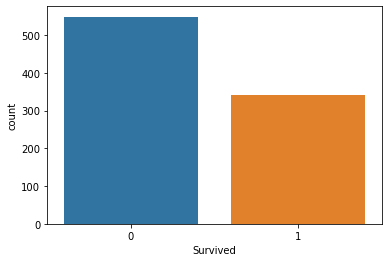

In [17]:
sns.countplot('Survived',data=train1)

In [18]:
train1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train1['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

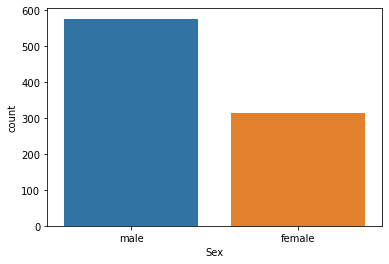

In [20]:
sns.countplot('Sex',data=train1)

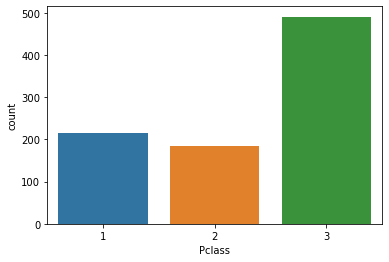

In [21]:
sns.countplot('Pclass',data=train1)

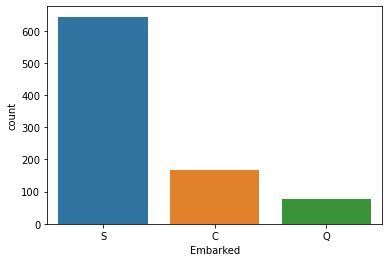

In [22]:
sns.countplot('Embarked',data=train1)

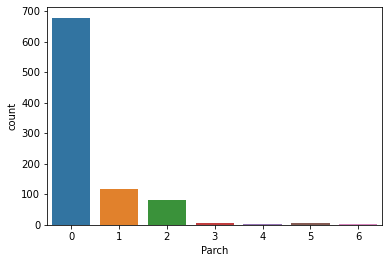

In [23]:
sns.countplot('Parch',data=train1)

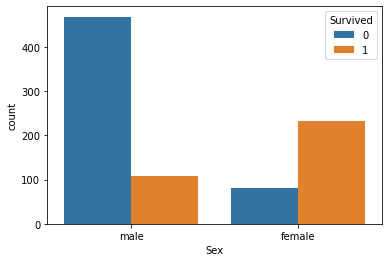

In [24]:
#Sex vs Target variable
sns.countplot(x='Sex',hue='Survived',data=train)

# Correlation matrix

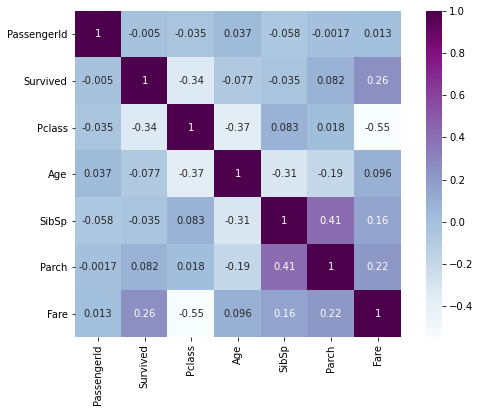

In [25]:
#correlation matrix
matrix=train1.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=1,square=True,cmap='BuPu',annot=True)

# Treatment for missing values

In [26]:
train1.drop('Cabin',inplace=True,axis=1)

In [27]:
test1.drop('Cabin',inplace=True,axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train1['Age']=le.fit_transform(train1['Age'])

In [29]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test1['Age']=le.fit_transform(test1['Age'])

In [31]:
test1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [32]:
#Assiging flag to embarked column
train1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
train1['Embarked']=train1['Embarked'].map({'S':0,'C':1,'Q':1})

In [34]:
test1['Embarked']=test1['Embarked'].map({'S':0,'C':1,'Q':1}).astype(int)

In [35]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [36]:
train1['Sex']=train1['Sex'].map({'male':1,'female':0})

In [37]:
test1['Sex']=test1['Sex'].map({'male':1,'female':0})

In [38]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,47,0,0,373450,8.0500,0.0


In [39]:
train1['Embarked']=train1['Embarked'].fillna(value='mean')

In [40]:
test1['Fare']=test1['Fare'].fillna(value='median')

In [41]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
test1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [43]:
train1['Survived'].quantile([0.1,0.2,0.3])
train1['Survived'].quantile([1.0,0.99,0.98])

1.00    1.0
0.99    1.0
0.98    1.0
Name: Survived, dtype: float64

In [44]:
train1.drop(train1[train1['Survived']>496.36].index,axis=0,inplace=True)

In [45]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
train1.drop(['Name','PassengerId','Ticket','Embarked'],axis=1,inplace=True)

In [47]:
test1.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

In [48]:
test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,44,0,0,1
1,893,3,0,60,1,0,0
2,894,2,1,74,0,0,1
3,895,3,1,34,0,0,0
4,896,3,0,27,1,1,0


In [49]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,28,1,0,7.2500
1,1,1,0,51,1,0,71.2833
2,1,3,0,34,0,0,7.9250
3,1,1,0,47,1,0,53.1000
4,0,3,1,47,0,0,8.0500


In [50]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 55.7 KB


In [51]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Embarked     418 non-null    int32
dtypes: int32(1), int64(6)
memory usage: 21.4 KB


In [52]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [53]:
feature_scale=['Age','Fare']
train1[feature_scale]=sts.fit_transform(train1[feature_scale])

In [54]:
feature_scale=['Age']
test1[feature_scale]=sts.fit_transform(test1[feature_scale])

In [55]:
X_train = train1.drop("Survived", axis=1)
Y_train = train1["Survived"]
X_test  = test1.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [56]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,-0.619539,1,0,-0.502445
1,1,0,-0.245450,1,0,0.786845
2,3,0,-0.521950,0,0,-0.488854
3,1,0,-0.310509,1,0,0.420730
4,3,1,-0.310509,0,0,-0.486337


In [57]:

Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [58]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,-0.289251,0,0,1
1,3,0,0.123841,1,0,0
2,2,1,0.485297,0,0,1
3,3,1,-0.547433,0,0,0
4,3,0,-0.728161,1,1,0


In [64]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred=classifier.predict(X_test)

In [66]:
classifier.score(X_train, Y_train)
acc_clf = round(classifier.score(X_train, Y_train) * 100, 2)
acc_clf

79.69

In [67]:
submission=pd.DataFrame({
   "PassengerId":test1["PassengerId"],
    "Survived":y_pred
})

In [68]:
submission.to_csv('titanic_submission2.csv',index=False)